<a href="https://colab.research.google.com/github/Jrnas2010/Men-Women-Classification/blob/main/Assignment%20.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("saadpd/menwomen-classification")

print("Path to dataset files:", path)

100%|██████████| 806M/806M [00:13<00:00, 61.9MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/saadpd/menwomen-classification/versions/1


In [10]:
#My dataset is available in googledrive; so I am accessing my drive from colab
from google.colab import drive
drive.mount('/content/drive', force_remount = True)
#Once this is executed, you will see your drive appearing on the left hand side

Mounted at /content/drive


In [11]:
# Define paths to the dataset
test_dir = '/content/drive/MyDrive/archive/testdata/testdata' #copy path where test data is located
train_dir = '/content/drive/MyDrive/archive/traindata/traindata'   #copy path where train data is located

In [12]:
# uplode files
import os
print(len(os.listdir('/content/drive/MyDrive/archive/testdata/testdata/men')))
print(len(os.listdir('/content/drive/MyDrive/archive/testdata/testdata/women')))
print(len(os.listdir('/content/drive/MyDrive/archive/traindata/traindata/men')))
print(len(os.listdir('/content/drive/MyDrive/archive/traindata/traindata/women')))

418
915
1000
1912


In [13]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Create ImageDataGenerator for training set
train_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2  # Split 20% of the images for validation
)

In [14]:
# Load and prepare training data
train_data = train_datagen.flow_from_directory(
    train_dir,
    target_size=(256,256),
    batch_size=32,
    class_mode='binary',  # 'binary' for binary classification (men vs. women)
    subset='training'  # Specify 'training' for the training set
)

Found 2313 images belonging to 2 classes.


In [15]:
# Create ImageDataGenerator for validation set
validation_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2  # Note: Using the same validation split as in the training set
)

In [16]:
# Load and prepare validation data
validation_data = validation_datagen.flow_from_directory(
    train_dir,
    target_size=(256,256),
    batch_size=32,
    class_mode='binary',
    subset='validation'  # Specify 'validation' for the validation set
)

Found 578 images belonging to 2 classes.


In [17]:
from tensorflow.keras.layers import Input

In [18]:
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,BatchNormalization,UpSampling2D, Dropout

In [19]:
# create CNN model

model = Sequential()

model.add(Conv2D(32,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(256,256,3)))  # 32 filters
#model.add(BatchNormalization())  # added to reduce overfitting
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(64,kernel_size=(3,3),padding='valid',activation='relu'))
#model.add(BatchNormalization())  # added to reduce overfitting
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(128,kernel_size=(3,3),padding='valid',activation='relu'))
#model.add(BatchNormalization())  # added to reduce overfitting
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Flatten())

model.add(Dense(128,activation='relu')) #feature reduction
#model.add(Dropout(0.1))  # added to reduce overfitting
model.add(Dense(64,activation='relu'))
#model.add(Dropout(0.1))  # added to reduce overfitting
model.add(Dense(1,activation='sigmoid'))  #output layer

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [20]:
from keras.optimizers import Adam
model.compile(optimizer=Adam(learning_rate=0.001),loss='binary_crossentropy',metrics=['accuracy']) #binary_crossentropy - binary classification

In [21]:
history = model.fit(train_data, epochs=20, validation_data=validation_data)

Epoch 1/20


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


73/73 ━━━━━━━━━━━━━━━━━━━━ 580s 7s/step - accuracy: 0.6329 - loss: 0.8195 - val_accuracy: 0.6419 - val_loss: 0.6549
Epoch 2/20
73/73 ━━━━━━━━━━━━━━━━━━━━ 445s 6s/step - accuracy: 0.6783 - loss: 0.6004 - val_accuracy: 0.6574 - val_loss: 0.6353
Epoch 3/20
73/73 ━━━━━━━━━━━━━━━━━━━━ 498s 6s/step - accuracy: 0.7361 - loss: 0.5263 - val_accuracy: 0.6263 - val_loss: 0.6547
Epoch 4/20
73/73 ━━━━━━━━━━━━━━━━━━━━ 438s 6s/step - accuracy: 0.8033 - loss: 0.4441 - val_accuracy: 0.6696 - val_loss: 0.7253
Epoch 5/20
73/73 ━━━━━━━━━━━━━━━━━━━━ 451s 6s/step - accuracy: 0.8365 - loss: 0.3444 - val_accuracy: 0.6903 - val_loss: 0.8062
Epoch 6/20
73/73 ━━━━━━━━━━━━━━━━━━━━ 443s 6s/step - accuracy: 0.8984 - loss: 0.2412 - val_accuracy: 0.6298 - val_loss: 1.1838
Epoch 7/20
73/73 ━━━━━━━━━━━━━━━━━━━━ 439s 6s/step - accuracy: 0.9517 - loss: 0.1311 - val_accuracy: 0.6713 - val_loss: 1.7153
Epoch 8/20
73/73 ━━━━━━━━━━━━━━━━━━━━ 433s 6s/step - accuracy: 0.9748 - loss: 0.0655 - val_accuracy: 0.6194 - val_loss: 2.

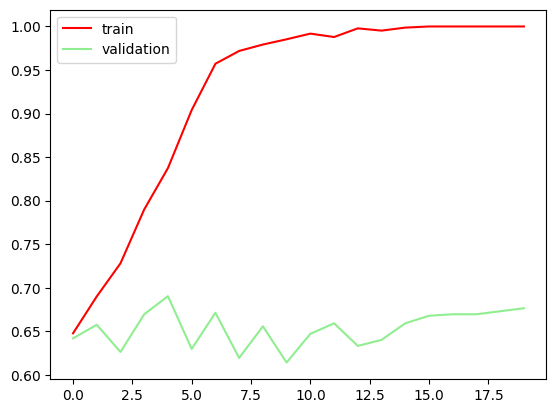

In [22]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'],color='Red',label='train')
plt.plot(history.history['val_accuracy'],color='lightgreen',label='validation')
plt.legend()
plt.show()

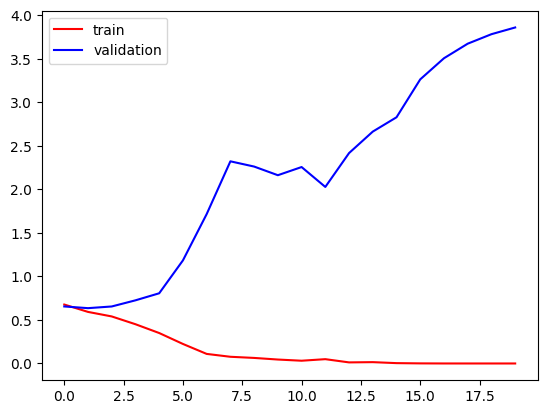

In [23]:
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()

In [24]:
test_datagen = ImageDataGenerator(rescale=1./255)
test_data = test_datagen.flow_from_directory(
    test_dir,
    target_size=(256,256),
    batch_size=32,
    class_mode='binary')

Found 1330 images belonging to 2 classes.


In [25]:
#predict the test data
predictions = model.predict(test_data)
print(predictions)

42/42 ━━━━━━━━━━━━━━━━━━━━ 139s 3s/step
[[3.5665609e-05]
 [1.0000000e+00]
 [1.0000000e+00]
 ...
 [1.0000000e+00]
 [9.9997735e-01]
 [1.0000000e+00]]


In [26]:
len(predictions)


1330

In [27]:
from sklearn.metrics import confusion_matrix, classification_report

# Assuming you have ground truth labels (true_labels) and predicted labels (predictions)
true_labels = test_data.classes
predicted_labels = (predictions > 0.5).astype(int)  # Adjust the threshold as needed

# Calculate confusion matrix
cm = confusion_matrix(true_labels, predicted_labels)

# Print confusion matrix
print("Confusion Matrix:")
print(cm)

# Print classification report
print("Classification Report:")
print(classification_report(true_labels, predicted_labels))

Confusion Matrix:
[[ 79 339]
 [209 703]]
Classification Report:
              precision    recall  f1-score   support

           0       0.27      0.19      0.22       418
           1       0.67      0.77      0.72       912

    accuracy                           0.59      1330
   macro avg       0.47      0.48      0.47      1330
weighted avg       0.55      0.59      0.56      1330



In [28]:
# create CNN model

model = Sequential()

model.add(Conv2D(32,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(256,256,3)))  # 32 filters
model.add(BatchNormalization())  # added to reduce overfitting
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(64,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())  # added to reduce overfitting
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(128,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())  # added to reduce overfitting
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Flatten())

model.add(Dense(128,activation='relu')) #feature reduction
model.add(Dropout(0.1))  # added to reduce overfitting
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.1))  # added to reduce overfitting
model.add(Dense(1,activation='sigmoid'))  #output layer

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [29]:
from keras.optimizers import Adam
model.compile(optimizer=Adam(learning_rate=0.001),loss='binary_crossentropy',metrics=['accuracy'])

In [30]:
history = model.fit(train_data, epochs=20, validation_data=validation_data)

Epoch 1/20
73/73 ━━━━━━━━━━━━━━━━━━━━ 621s 8s/step - accuracy: 0.5602 - loss: 5.8365 - val_accuracy: 0.4689 - val_loss: 4.2579
Epoch 2/20
73/73 ━━━━━━━━━━━━━━━━━━━━ 650s 9s/step - accuracy: 0.6586 - loss: 2.3347 - val_accuracy: 0.4308 - val_loss: 1.7933
Epoch 3/20
73/73 ━━━━━━━━━━━━━━━━━━━━ 639s 8s/step - accuracy: 0.6421 - loss: 1.2732 - val_accuracy: 0.3893 - val_loss: 1.2746
Epoch 4/20
73/73 ━━━━━━━━━━━━━━━━━━━━ 598s 8s/step - accuracy: 0.6664 - loss: 0.8212 - val_accuracy: 0.6090 - val_loss: 0.8703
Epoch 5/20
73/73 ━━━━━━━━━━━━━━━━━━━━ 625s 8s/step - accuracy: 0.6835 - loss: 0.6619 - val_accuracy: 0.5709 - val_loss: 0.7629
Epoch 6/20
73/73 ━━━━━━━━━━━━━━━━━━━━ 613s 8s/step - accuracy: 0.7277 - loss: 0.5406 - val_accuracy: 0.5779 - val_loss: 0.7698
Epoch 7/20
73/73 ━━━━━━━━━━━━━━━━━━━━ 597s 8s/step - accuracy: 0.7554 - loss: 0.4998 - val_accuracy: 0.6644 - val_loss: 0.7137
Epoch 8/20
73/73 ━━━━━━━━━━━━━━━━━━━━ 606s 8s/step - accuracy: 0.8018 - loss: 0.4128 - val_accuracy: 0.6592 - v

In [31]:
test_datagen = ImageDataGenerator(rescale=1./255)
test_data = test_datagen.flow_from_directory(
    test_dir,
    target_size=(256,256),
    batch_size=32,
    class_mode='binary'
)

Found 1330 images belonging to 2 classes.


In [32]:
predictions = model.predict(test_data)

/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


42/42 ━━━━━━━━━━━━━━━━━━━━ 80s 2s/step


In [33]:
from sklearn.metrics import confusion_matrix, classification_report

# Assuming you have ground truth labels (true_labels) and predicted labels (predictions)
true_labels = test_data.classes
predicted_labels = (predictions > 0.5).astype(int)  # Adjust the threshold as needed

# Calculate confusion matrix
cm = confusion_matrix(true_labels, predicted_labels)

# Print confusion matrix
print("Confusion Matrix:")
print(cm)

# Print classification report
print("Classification Report after applying techniques to handle overfitting:")
print(classification_report(true_labels, predicted_labels))

Confusion Matrix:
[[ 93 325]
 [158 754]]
Classification Report after applying techniques to handle overfitting:
              precision    recall  f1-score   support

           0       0.37      0.22      0.28       418
           1       0.70      0.83      0.76       912

    accuracy                           0.64      1330
   macro avg       0.53      0.52      0.52      1330
weighted avg       0.60      0.64      0.61      1330



In [34]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten

resnet_model = Sequential()    #ResNet50 is a pre-trained model
pretrained_model = tf.keras.applications.ResNet50(include_top = False, #because i have my own image of a diff dimension
                                                input_shape = (256,256,3),
                                                pooling = 'max', classes = 2,
                                                weights = 'imagenet')
for layer in pretrained_model.layers:
    layer.trainable = False  #all layers in the Resnet50 is not trainable; keep those weights; I am going to add my own i/p and other layers

resnet_model.add(pretrained_model)
resnet_model.add(Flatten())
resnet_model.add(Dense(512, activation = 'relu'))
resnet_model.add(Dense(1, activation = 'sigmoid'))

In [35]:
from keras.optimizers import Adam
resnet_model.compile(optimizer=Adam(learning_rate=0.001),loss='binary_crossentropy',metrics=['accuracy'])

In [36]:
history = resnet_model.fit(train_data, epochs=20, validation_data=validation_data)

Epoch 1/20
73/73 ━━━━━━━━━━━━━━━━━━━━ 719s 10s/step - accuracy: 0.5307 - loss: 3.0882 - val_accuracy: 0.6626 - val_loss: 0.6370
Epoch 2/20
73/73 ━━━━━━━━━━━━━━━━━━━━ 747s 10s/step - accuracy: 0.6624 - loss: 0.6264 - val_accuracy: 0.6799 - val_loss: 0.6126
Epoch 3/20
73/73 ━━━━━━━━━━━━━━━━━━━━ 704s 10s/step - accuracy: 0.6626 - loss: 0.6187 - val_accuracy: 0.4879 - val_loss: 0.8378
Epoch 4/20
73/73 ━━━━━━━━━━━━━━━━━━━━ 742s 10s/step - accuracy: 0.6554 - loss: 0.6535 - val_accuracy: 0.6661 - val_loss: 0.7363
Epoch 5/20
73/73 ━━━━━━━━━━━━━━━━━━━━ 739s 10s/step - accuracy: 0.6459 - loss: 0.7808 - val_accuracy: 0.6471 - val_loss: 0.6557
Epoch 6/20
73/73 ━━━━━━━━━━━━━━━━━━━━ 770s 10s/step - accuracy: 0.6818 - loss: 0.6171 - val_accuracy: 0.6626 - val_loss: 0.6821
Epoch 7/20
73/73 ━━━━━━━━━━━━━━━━━━━━ 746s 10s/step - accuracy: 0.7242 - loss: 0.5597 - val_accuracy: 0.6609 - val_loss: 0.6877
Epoch 8/20
73/73 ━━━━━━━━━━━━━━━━━━━━ 742s 10s/step - accuracy: 0.7159 - loss: 0.5682 - val_accuracy: 0.

In [37]:
predictions = resnet_model.predict(test_data)

42/42 ━━━━━━━━━━━━━━━━━━━━ 346s 8s/step


In [38]:
from sklearn.metrics import confusion_matrix, classification_report

# Assuming you have ground truth labels (true_labels) and predicted labels (predictions)
true_labels = test_data.classes
predicted_labels = (predictions > 0.5).astype(int)  # Adjust the threshold as needed

# Calculate confusion matrix
cm = confusion_matrix(true_labels, predicted_labels)

# Print confusion matrix
print("Confusion Matrix:")
print(cm)

# Print classification report
print("Classification Report after applying techniques to handle overfitting:")
print(classification_report(true_labels, predicted_labels))

Confusion Matrix:
[[117 301]
 [282 630]]
Classification Report after applying techniques to handle overfitting:
              precision    recall  f1-score   support

           0       0.29      0.28      0.29       418
           1       0.68      0.69      0.68       912

    accuracy                           0.56      1330
   macro avg       0.48      0.49      0.49      1330
weighted avg       0.56      0.56      0.56      1330

